NOMBRE: José Luis Calvo Subirá

https://colab.research.google.com/drive/1Q2w2CpQJP7f1Od2GBzI3Yoqi4WM1tonf?usp=sharing

GitHub link: https://github.com/jlcsub31/03MIAR---Algoritmos-de-Optimizacion

#TORRES DE HANOY - DIVIDE Y VENCERÁS

In [ ]:
def torres_hanoi(N, desde, hasta):
  '''
    N: número de fichas
    desde: número de poste inicial
    hasta: número de poste objetivo
  '''

  #Caso básico
  if N ==1:
    print(f"Llevar la ficha desde {desde} hasta {hasta}")
  else:
    #Se calcula el poste pivote
    poste_pivote = 6 - desde - hasta
    torres_hanoi(N-1, desde, poste_pivote)
    print(f"Llevar la ficha desde {desde} hasta {hasta}")
    torres_hanoi(N-1, poste_pivote,  hasta)

In [ ]:
torres_hanoi(4,1,3)

Llevar la ficha desde 1 hasta 2
Llevar la ficha desde 1 hasta 3
Llevar la ficha desde 2 hasta 3
Llevar la ficha desde 1 hasta 2
Llevar la ficha desde 3 hasta 1
Llevar la ficha desde 3 hasta 2
Llevar la ficha desde 1 hasta 2
Llevar la ficha desde 1 hasta 3
Llevar la ficha desde 2 hasta 3
Llevar la ficha desde 2 hasta 1
Llevar la ficha desde 3 hasta 1
Llevar la ficha desde 2 hasta 3
Llevar la ficha desde 1 hasta 2
Llevar la ficha desde 1 hasta 3
Llevar la ficha desde 2 hasta 3


###Complejidad Torres de Hanoi: Exponencial
Por cada iteración:
- 1 torres_hanoi
- 1 print
- 1 torres_hanoi
$$ T(n) = 1 + 2*T(n-1) = 1 + 2*(1 + 2*T(n-2))$$
Orden de complejidad $O(2^{n})$

# CAMBIO DE MONEDAS - TÉCNICA VORAZ

In [ ]:
def cambio_monedas(cantidad, sistema_monetario):
  '''
    cantidad: cantidad a calcular
    sistema_monetario: monedas disponibles, e.g [25, 10, 5, 1]
  '''
  res = []
  total = cantidad
  sistema_monetario.sort(reverse=True)

  for item in sistema_monetario:
    res.append(total//item)
    total = total % item
    if total == 0:
      return res;
  
  print("No se puede encontrar una solucion exacta")

In [ ]:
SISTEMA = [12, 5 ,2, 1]
cambio_monedas(15,SISTEMA)

[1, 0, 1, 1]

In [ ]:
SISTEMA = [25, 10 ,5, 1]
cambio_monedas(80,SISTEMA)

[3, 0, 1]

In [ ]:
SISTEMA = [25, 10 ,5, 1]
cambio_monedas(123,SISTEMA)

[4, 2, 0, 3]

In [ ]:
#Ejemplo de limitación en la técnica voraz: solución óptima -> 3 monedas de 5
SISTEMA = [11, 5 , 1]
cambio_monedas(15,SISTEMA)

[1, 0, 4]

In [ ]:
cambio_monedas(180, [2,5,10,20,50])

[3, 1, 1]

###Complejidad Cambio monedas: Lineal
$O(n)$ 

#PROBLEMA DE LAS 4 REINAS: BACKTRACKING

In [ ]:
#Traduce la solución al tablero
def escribe_solucion(S):
  n = len(S)
  for x in range(n):
    print("")
    for i in range(n):
      if S[i] == x+1:
        print(" X " , end="")
      else:
        print(" - ", end="")

def es_prometedora(solucion,etapa):
  '''  
    solucion: posible solucion
    etapa

    Returns:
    Devuelve si una solucion es prometedora:
      - True si lo es
      - False en caso contrario
  '''
  for i in range(etapa+1):
    #Se comprueba que no haya reinas en la misma fila
    if sum(k == solucion[i] for k in solucion) > 1:  
      return False
  
    #Se comprueba que no hay reinas en la misma diagonal
    for j in range(i+1, etapa +1 ):
      if abs(i-j) == abs(solucion[i]- solucion[j]): 
        return False
  #Si pasa todas las validaciones, la solucion es prometedora
  return True



#Proceso principal de N-Reinas
def reinas(N, solucion=[],etapa=0):
  '''
    N: dimensión del tablero
  '''
  if len(solucion) == 0:
    #Se inicializa la solucion
    solucion = [0 for i in range(N)]
  
  for i in range(1, N+1):
    solucion[etapa] = i
    if es_prometedora(solucion, etapa):
      #Dado que etapa comienza con valor cero, su valor debe llegar hasta n-1 para tener un total de n etapas
      if etapa == N-1:
        print(solucion)
      else:
        reinas(N, solucion, etapa+1)
  solucion[etapa] = 0



In [ ]:
reinas(4,solucion=[],etapa=0)

[2, 4, 1, 3]
[3, 1, 4, 2]


In [ ]:
escribe_solucion([2, 4, 1, 3])


 -  -  X  - 
 X  -  -  - 
 -  -  -  X 
 -  X  -  - 

In [ ]:
reinas(8,solucion=[],etapa=0)

[1, 5, 8, 6, 3, 7, 2, 4]
[1, 6, 8, 3, 7, 4, 2, 5]
[1, 7, 4, 6, 8, 2, 5, 3]
[1, 7, 5, 8, 2, 4, 6, 3]
[2, 4, 6, 8, 3, 1, 7, 5]
[2, 5, 7, 1, 3, 8, 6, 4]
[2, 5, 7, 4, 1, 8, 6, 3]
[2, 6, 1, 7, 4, 8, 3, 5]
[2, 6, 8, 3, 1, 4, 7, 5]
[2, 7, 3, 6, 8, 5, 1, 4]
[2, 7, 5, 8, 1, 4, 6, 3]
[2, 8, 6, 1, 3, 5, 7, 4]
[3, 1, 7, 5, 8, 2, 4, 6]
[3, 5, 2, 8, 1, 7, 4, 6]
[3, 5, 2, 8, 6, 4, 7, 1]
[3, 5, 7, 1, 4, 2, 8, 6]
[3, 5, 8, 4, 1, 7, 2, 6]
[3, 6, 2, 5, 8, 1, 7, 4]
[3, 6, 2, 7, 1, 4, 8, 5]
[3, 6, 2, 7, 5, 1, 8, 4]
[3, 6, 4, 1, 8, 5, 7, 2]
[3, 6, 4, 2, 8, 5, 7, 1]
[3, 6, 8, 1, 4, 7, 5, 2]
[3, 6, 8, 1, 5, 7, 2, 4]
[3, 6, 8, 2, 4, 1, 7, 5]
[3, 7, 2, 8, 5, 1, 4, 6]
[3, 7, 2, 8, 6, 4, 1, 5]
[3, 8, 4, 7, 1, 6, 2, 5]
[4, 1, 5, 8, 2, 7, 3, 6]
[4, 1, 5, 8, 6, 3, 7, 2]
[4, 2, 5, 8, 6, 1, 3, 7]
[4, 2, 7, 3, 6, 8, 1, 5]
[4, 2, 7, 3, 6, 8, 5, 1]
[4, 2, 7, 5, 1, 8, 6, 3]
[4, 2, 8, 5, 7, 1, 3, 6]
[4, 2, 8, 6, 1, 3, 5, 7]
[4, 6, 1, 5, 2, 8, 3, 7]
[4, 6, 8, 2, 7, 1, 3, 5]
[4, 6, 8, 3, 1, 7, 5, 2]
[4, 7, 1, 8, 5, 2, 6, 3]


#Encontrar Puntos Más Cercanos

###1. 1D - FUERZA BRUTA

In [ ]:
def puntos_mas_cercanos(lista):
  '''
  Arguments:
    lista: array de puntos
  Returns:
    Tupla de puntos con la mínima distacia de puntos entre sí
  '''
  distancia_minima = max(lista)
  n = len(lista)
  puntos = ()
  for i in range(n):
    for j in range(i+1, n):
      if abs(lista[i] - lista[j]) < distancia_minima:
        distancia_minima = abs(lista[i] - lista[j])
        puntos = (lista[i], lista[j])
  return puntos




In [ ]:
import random

LISTA_1D = [random.randrange(1,10) for x in range(10)]
print(LISTA_1D)

puntos_mas_cercanos(LISTA_1D)

[4, 4, 9, 5, 7, 8, 7, 4, 2, 8]


(4, 4)

###Complejidad Fuerza Bruta

$O(n^2)$

###2. 1D - DIVIDE Y VENCERÁS

In [ ]:
import math

def calcula_distancia(par_puntos):
    if par_puntos is None:
      return math.inf
    return abs(par_puntos[0] - par_puntos[1])

def puntos_mas_cercanos_interseccion(P, d, p):
    strip = []
    limite_izq = p - d
    limite_dcha = p + d
    puntos_interseccion = [punto for punto in P if punto > limite_izq and punto < limite_dcha and punto != p]
    puntos_mas_cercanos = None
    for i in range(len(puntos_interseccion)):
        if abs(puntos_interseccion[i] - p) < d:
            puntos_mas_cercanos = (p, puntos_interseccion[i])
    return puntos_mas_cercanos

def puntos_mas_cercanos_DyV(P):
    n = len(P)
    if n < 2:
      return (0, math.inf)
    if n == 2:
      return (P[0], P[1])
    mitad = n//2
    punto_medio = P[mitad]
    d1 = puntos_mas_cercanos_DyV(P[0:mitad])
    d2 = puntos_mas_cercanos_DyV(P[mitad:])
    distancia_minima = min(abs(d1[0] - d1[1]), abs(d2[0] - d1[0]))
    d3 = puntos_mas_cercanos_interseccion(P, distancia_minima, punto_medio)
     
    res = None
    for puntos in [d1, d2, d3]:
        if calcula_distancia(puntos) < calcula_distancia(res):
            res = puntos
    return res

def puntos_divide_venceras(P):
  #Sort
  sorted(P)
  return puntos_mas_cercanos_DyV(P)

In [ ]:
import random

lista1d = [random.randrange(1,10000) for x in range(1000)]
print(lista1d)
print(puntos_divide_venceras(lista1d))



[2935, 7789, 6953, 4622, 7293, 952, 6064, 2657, 2599, 2582, 706, 6605, 7792, 3414, 8369, 5826, 9260, 921, 2897, 3956, 2391, 6960, 1398, 9576, 393, 2224, 8450, 8066, 2423, 379, 7182, 2734, 9927, 8195, 1007, 4680, 8904, 6203, 1233, 2247, 7271, 3808, 8305, 1180, 8524, 4782, 4188, 6268, 1163, 6946, 9407, 2493, 7820, 277, 1935, 9363, 7414, 8972, 8915, 9279, 161, 8418, 7830, 5619, 3617, 6295, 7761, 7208, 5457, 9204, 3638, 5568, 1051, 7238, 4123, 2997, 7474, 6346, 8915, 830, 6836, 6620, 930, 2216, 7193, 9236, 7099, 1612, 9726, 8948, 6367, 1349, 236, 7452, 1144, 2320, 7580, 5141, 4445, 2231, 4484, 316, 4402, 1366, 8231, 5496, 7686, 6578, 9262, 8262, 3720, 4010, 5038, 5522, 2824, 4179, 6623, 1849, 6926, 2343, 436, 133, 3631, 3674, 3002, 4965, 5959, 5007, 9868, 1882, 4362, 3616, 8178, 6458, 5777, 3773, 6411, 9961, 6706, 5778, 4002, 8884, 9993, 3942, 3107, 3710, 7879, 4495, 9999, 7754, 4687, 8953, 1298, 1844, 9651, 7417, 641, 9066, 8459, 8520, 5503, 1555, 7925, 334, 4994, 929, 3384, 1368, 8507, 9

###3. 2D - DIVIDE Y VENCERÁS

Se reescribe el código para 2D

In [ ]:
def calcula_distancia_euclidea(par):
    if par is None:
        return math.inf
    p1 = par[0]
    p2 = par[1]
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def sort_by_axis(array, axis=0):
  return sorted(array, key=lambda x: x[axis])

def puntos_mas_cercanos_DyV_2d(Px, Py):
    n = len(Px)
    if n < 2:
      return ((0,0), (math.inf, math.inf))
    if n == 2:
      return (Px[0], Px[1])

    mitad = n//2
    punto_medio = Px[mitad]
    Lx = Px[:mitad]
    Rx = Px[mitad:]
    Ly = [punto for punto in Py if punto in Lx]
    Ry = [punto for punto in Py if punto in Rx]

    d1 = puntos_mas_cercanos_DyV_2d(Lx, Ly)
    d2 = puntos_mas_cercanos_DyV_2d(Rx, Ry)
    distancia_minima = min(calcula_distancia_euclidea(d1), calcula_distancia_euclidea(d2))
    d3 = puntos_mas_cercanos_interseccion2d(Px, Py, distancia_minima, punto_medio)

    res = None
    for par in [d1, d2, d3]:
        if calcula_distancia_euclidea(par) < calcula_distancia_euclidea(res):
            res = par
    return res

def puntos_mas_cercanos_interseccion2d(Px, Py, d, p):
    limite_izq = p[0] - d
    limite_dcha = p[0] + d
    puntos_interseccion = [punto for punto in Px if punto[0] > limite_izq and punto[0] < limite_dcha]
    puntos_interseccion_y = [punto for punto in Py if punto in puntos_interseccion]

    min_dist = d
    puntos_mas_cercanos = None
    for i in range(1, len(puntos_interseccion_y) - 1):
        for j in range(1, min(7, len(puntos_interseccion_y) - i)):
            par = (puntos_interseccion_y[i], puntos_interseccion_y[i+j])
            if calcula_distancia_euclidea(par) < min_dist:
                puntos_mas_cercanos = par
    return puntos_mas_cercanos

def divide_venceras_2d(P):
    Px = sort_by_axis(P, axis=0)
    #Notese la ordenacion de los puntos por la coordenada y en este punto del algoritmo
    Py = sort_by_axis(P, axis=1)
    return puntos_mas_cercanos_DyV_2d(Px, Py)

In [ ]:
import random
lista2d = [(random.randrange(1, 10000),random.randrange(1, 10000)) for x in range(1000)]

print(lista2d)

print(divide_venceras_2d(lista2d))

[(6863, 5092), (953, 2633), (3950, 2265), (9171, 9717), (5056, 7549), (8564, 3249), (1968, 812), (3807, 9848), (2074, 2617), (6436, 804), (4163, 1948), (645, 6577), (1089, 8050), (4979, 1113), (8079, 1046), (1098, 4033), (7029, 2496), (5726, 7423), (1469, 5951), (5284, 8166), (1180, 1962), (3853, 7403), (9612, 9642), (247, 1399), (2391, 7344), (5866, 922), (3769, 687), (2170, 2565), (3391, 6749), (8738, 2420), (7125, 860), (6645, 7028), (9171, 7192), (3458, 169), (7546, 2387), (1501, 1938), (4063, 6142), (4603, 9041), (7991, 3732), (2817, 6630), (8050, 3678), (7183, 3032), (9845, 9592), (1946, 961), (776, 6408), (1129, 2705), (4276, 6731), (7299, 8637), (4842, 3643), (6454, 2966), (9946, 1708), (7295, 5539), (6863, 5219), (3048, 7820), (7664, 1015), (6904, 6231), (3002, 6170), (934, 7747), (1133, 5760), (2656, 2563), (1040, 22), (2544, 9783), (5336, 5112), (323, 2657), (1333, 8358), (6496, 7069), (3891, 5345), (3601, 456), (4086, 3075), (3182, 9272), (8219, 4513), (359, 7310), (9144, 4

### COMPLEJIDAD DIVIDE Y VENCERÁS EN PUNTOS MÁS CERCANOS

Tal y como se ha visto anteriormente, la complejidad por fuerza bruta es $O(n^2)$

Los pasos seguidos para implementar el algoritmo basado en la técnica "divide y vencerás" son los siguientes:

1. Dividir el conjunto inicial de datos en dos mitades iguales, y obtener recusrivamente el par de puntos más cercanos de cada mitad
2. Se obtiene la distancia mínima "d" total teniendo en cuenta ambas mitades. $O(n)$
3. Se evaluan los puntos dentro de un rango "d" a partir del punto por el que se ha partido el conjunto inicial en dos mitades. - $O(n)$
4. Se ordenan los puntos por su coordenada "y". - $O(nlog(n))$
5. De los puntos restantes, se calculan las distancias de cada punto con sus seis vecinos (imagen 1). - $O(n)$
6. Si alguna de las distancias calculada en 5 resulta ser menor que la del punto 2, entonces se actualiza el par de puntos que componen la solución. - $O(1)$

No obstante, la implementación del algoritmo ha variado levemente respecto a lo descrito. En este caso, como parte del paso 1 se retornan los puntos de cada mitad ya ordenados por su coordenada "y", de modo que en el paso 4 solo es necesario mergear ambas listas. En el código aparece específicamente anotado la ordenación de los puntos por la coordenada "y".

De este modo, ahora la complejidad del paso 4 pasa a ser $O(n)$. Teniendo en cuenta recursividad del algoritmo, la complejidad final es $O(nlog(n))$, ya que el término dominante entre los pasos 1-6 actualizados es $O(n)$. Si los pasos 1 y 4 se mantuvieran sin cambio alguno, la complejidad del algoritma sería $O(nlog(n)log(n))$.

Imagen1:
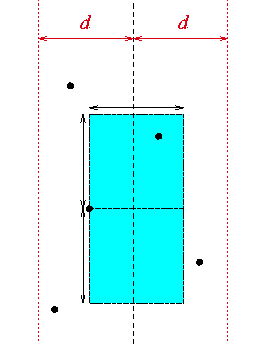